# ETL & Analysis on MRTS Sales Data

**Tessa Maddy**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project uses Monthly Retail Trade Survey data collected by the U.S. Census Bureau. I first prepare the data by an Extract-Transform-Load (ETL) process. Once the data was loaded into a SQL table, I am able to perform analysis and visualization using Python. I explore trends by annualizing data, plotting percentage changes, and exploring rolling time windows to smooth the data and gain a further understanding in the economic trends for different business types.

[Back to top](#Index)


## 1. Introduction

For this project, I performed an ETL process and then analysis on Monthly Retail Trade Survey data collected by the U.S. Census Bureau. I started out with the ETL process. It consisted of extracting the data from the excel download from the U.S. Census Bureau. Then I transformed the data by running a loop for each year's sheet by dropping headers, footers, and  extraneous columns (like NAICS and total). From there I changed the date format and reformatted the null data and then melted the data to prepare it for timeseries analysis. After that I created a dataframe and appended it to include each year's CSVs data. To load the data into a SQL table, I created a SQL installation script to create a database and then a table that iterrated over each row of the dataframe to insert into the table. Once the table was created, the second portion of the project was to perform analysis and plot visualizations. To do this, I first explored trends in total sales for the retail and food services and then compared businesses such as bookstores, sporting goods stores, and hobbies, toys, and games stores. I plot annualized data, quarterly data, and monthly data. From there, I explore percentage changes to see relative change between time periods using women's clothing and men's clothing businesses as an example. Finally, I explore moving averages by using rolling time windows for food service businesses and grocery stores to see how smoothing data by averaging over 3,6, and 12 months shows the economic trend without as much seasonal effects.

[Back to top](#Index)

## 2. Extract-Transform-Load

[Back to top](#Index)

### 2.1 The ETL Process

In order to use the MRTS data for spending pattern analysis I had to perform the following ETL process:

**1. Extract ~ Take data from excel and place into python dataframe~:** I downloaded the excel file and then read in the data, sheet by sheet using pd.read_excel.

**2. Transformation:** I transformed the data before I exported it as a csv in order to save time and not manually clean the data. To transform the data, I went sheet by sheet (within a loop) and dropped headers, footers, and got rid of extraneous columns (like NAICS and total). Then I changed the date format from month name and year to a standard date format, mm/dd/YYYY, and reformatted the null data from (S) to none to make sure it could get loaded into SQL. From there to make the data more readable and prepare it for timeseries analysis I melted the data to have it read as three columns in the dataframe (Date, business type, and amount_millions). This also allowed me to easily append the data for each of the years.


**3. Load:** This step makes the data available to the business line to perform analysis. Here I added the data from the pandas dataframe I created to a new SQL database and table I created through my Python installation script. From here, I could query through MySQL WorkBench or a Python script that connects to the SQL database.

[Back to top](#Index)

### 2.2 Data Exploration


The Monthly Retail Trade Survey data is collected by the U.S. Census Bureau. It provides current estimates of sales at retail and food services stores and inventories held by retail stores. The data coveres companies with one or more establishments that sell merchandise and related services to final consumers.

- The companies provide dollar value of retail sales and some firms also provide data on value of end-of-month inventories.-
- Monthly frequency, with a new sample chosen approximately every 5 years.
- Firms selected for the survey are first stratified by major kind of business and estimated sales. The sampling method combines a mail-out/mail-back survey of about 12,500 retail businesses with paid employees and is supplemented by estimates for nonemployers, new employers, and missed employers obtained from benchmarking to the Annual Retail Trade Survey. The sample of retail firms is drawn from the Business Register and is updated quarterly to reflect employer business "births" and "deaths."
- Data are both seasonally adjusted and unadjusted.
- This data is used in a variety of different business contexts:
1.  The Bureau of Economic Analysis uses the estimates to calculate Gross Domestic Product.
2. The Bureau of Labor Statistics uses the estimates to develop consumer price indexes and productivity measurements.
3. The Council of Economic Advisers uses the estimates to analyze current economic activity.
4. The Federal Reserve Board uses the estimates to assess recent trends in consumer purchases.
5.  The media use the estimates to report news of recent consumer activity.
6. Financial and investment companies use the estimates to measure recent economic trends.



[Back to top](#Index)

### 2.3 Data Preparation

I modified the data through python after reading in the excel file sheet by sheet in order to save some time manually cleaning it and then exported it as a csv from there. I found that this saved me time and also helped me learn how to handle and clean data in python. To do this: I first did a trial run with 2020 data and used that as my test data set to test out how Python can be used to read CSV files. After I figured out how to get it to work for 2020 data I used that as my foundation and created a loop to go through all the years of data and created csvs for each year with cleaned data.

To clean my data: I got rid of the headers, dropped the unneccessary columns (like the NAICS and total column), dropped the data that was "adjusted," and all the footnotes on the bottom. From there, I renamed the month columns to be in a date format (mm/dd/yyyy) and renamed some of the columns to be more understandable. I also replaced the (S) to none. From there to make the data more readable and avoid having a bunch of columns with super long names I melted the data to have it read as three columns in the dataframe (Date, business type, and amount_millions). This made a lot more sense to me then to just transpose the data which I did originally and I knew would be too messy to call on the business types I wanted since they have very long names and it made more sense to melt the data to easily end up aggregating the other years data.

In [1]:
## 2020 Trial run to clean data and save it as a csv
import pandas as pd
import mysql.connector as mysql
import numpy as np

df = pd.read_excel('mrts_full_data.xls', sheet_name= '2020', header = 4)
df = df.drop(df.index[0])
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('TOTAL', axis=1)
df = df.rename(columns = {'Unnamed: 1':'business_type',
                          'Jan. 2020': '01/01/2020', 
                          'Feb. 2020': '02/01/2020', 
                          'Mar. 2020': '03/01/2020', 
                          'Apr. 2020': '04/01/2020',
                          'May 2020':  '05/01/2020',
                          'Jun. 2020': '06/01/2020',
                          'Jul. 2020': '07/01/2020',
                          'Aug. 2020': '08/01/2020',
                          'Sep. 2020': '09/01/2020',
                          'Oct. 2020': '10/01/2020',
                          'Nov. 2020': '11/01/2020',
                          'Dec. 2020': '12/01/2020',
                         })
df= df.iloc[0:64]
df = df.replace({np.nan: None}, {'(S)': None})
df1 = df.melt(id_vars=['business_type'])
df1 = df1.rename(columns = {'variable':'date',
                           'value': 'amount_millions'}
               )
df1['amount_millions'] = pd.to_numeric(df1['amount_millions'],errors='coerce')
df1= df1.replace({np.nan: None})
#df1['date'] = pd.to_datetime(df1['date'], format='%m/%d/%Y')
df1.to_csv('2020.csv')


In [2]:
### Loop through all years worth of data

x = range(1992, 2020, 1)
for i in x:
    df = pd.read_excel('mrts_full_data.xls', sheet_name= str(i), header = 4)
    df = df.drop(df.index[0])
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('TOTAL', axis=1)
    df = df.rename(columns = {'Unnamed: 1':'business_type',
                          'Jan. '+ str(i) : '01/01/'+ str(i), 
                          'Feb. '+ str(i) :'02/01/'+ str(i), 
                          'Mar. '+ str(i):'03/01/'+ str(i), 
                          'Apr. '+ str(i): '04/01/'+ str(i),
                          'May '+ str(i):  '05/01/'+ str(i),
                          'Jun. '+ str(i): '06/01/'+ str(i),
                          'Jul. '+ str(i):'07/01/'+ str(i),
                          'Aug. '+ str(i): '08/01/'+ str(i),
                          'Sep. '+ str(i): '09/01/'+ str(i),
                          'Oct. '+ str(i): '10/01/'+ str(i),
                          'Nov. '+ str(i): '11/01/'+ str(i),
                          'Dec. '+ str(i): '12/01/'+ str(i)
                         })
    df= df.iloc[0:64]
    df = df.replace({np.nan: None}, {'(S)': None})
    df1 = df.melt(id_vars=['business_type'])
    df1 = df1.rename(columns = {'variable':'date',
                           'value': 'amount_millions'}
               )
    df1['amount_millions'] = pd.to_numeric(df1['amount_millions'],errors='coerce')
    df1= df1.replace({np.nan: None})
    #df1['date'] = pd.to_datetime(df1['date'], format='%m/%d/%Y')
    df1.to_csv(str(i)+'.csv')

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python can be used to read CSV files through csv_reader which is basically a CSV parser, or if you want to use the data in the CSV, you can also use pandas and the read_csv function which can help you put it into a dataframe.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The sample dataset I have chosen is the csv I created while cleaning the 2020 MRTS data. There are two ways that it can be read in.

#### Read CSV and put it into a dataframe

In [3]:
import pandas as pd
sample_df = pd.read_csv('2020.csv')
    
sample_df

,Unnamed: 0,business_type,date,amount_millions
0,0,"Retail and food services sales, total",01/01/2020,480301.0
1,1,Retail sales and food services excl motor vehi...,01/01/2020,386934.0
2,2,Retail sales and food services excl gasoline s...,01/01/2020,440605.0
3,3,Retail sales and food services excl motor vehi...,01/01/2020,347238.0
4,4,"Retail sales, total",01/01/2020,418734.0
...,...,...,...,...
763,763,Fuel dealers,12/01/2020,3723.0
764,764,Food services and drinking places,12/01/2020,51497.0
765,765,Drinking places,12/01/2020,NaN
766,766,Restaurants and other eating places,12/01/2020,47987.0


#### READ CSV through csv_reader

In [4]:
import csv
with open('2020.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    for row in csv_reader:
        print(row)

['', 'business_type', 'date', 'amount_millions']
['0', 'Retail and food services sales, total', '01/01/2020', '480301.0']
['1', 'Retail sales and food services excl motor vehicle and parts', '01/01/2020', '386934.0']
['2', 'Retail sales and food services excl gasoline stations', '01/01/2020', '440605.0']
['3', 'Retail sales and food services excl motor vehicle and parts and gasoline stations', '01/01/2020', '347238.0']
['4', 'Retail sales, total', '01/01/2020', '418734.0']
['5', 'Retail sales, total (excl. motor vehicle and parts dealers)', '01/01/2020', '325367.0']
['6', 'GAFO(1)', '01/01/2020', '94549.0']
['7', 'Motor vehicle and parts dealers', '01/01/2020', '93367.0']
['8', 'Automobile and other motor vehicle dealers', '01/01/2020', '85832.0']
['9', 'Automobile dealers', '01/01/2020', '81214.0']
['10', 'New car dealers', '01/01/2020', '72074.0']
['11', 'Used car dealers', '01/01/2020', '9140.0']
['12', 'Automotive parts, acc., and tire stores', '01/01/2020', '7535.0']
['13', 'Furni

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

I read the MRTS CSV files the same way as above. By importing pandas and then running the pd.read_csv() function.

In [5]:

tmp2 = pd.DataFrame()
   
x = range(1992, 2021, 1)
for i in x:
    df = pd.read_csv(str(i)+".csv") 
    df= df.replace({np.nan: None})
    tmp2= tmp2.append(df, ignore_index=True)
tmp2 = tmp2.drop('Unnamed: 0', axis=1)



[Back to top](#Index)

### 2.5 Writing an Installation Script

The Python installation script to read my dataset in MySQL WorkBench :

In [6]:
##CREATE DATABASE
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', port='3306', user='root',  
                    password='password')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("DROP DATABASE IF EXISTS `mrts_all`")
    cursor.execute("CREATE DATABASE IF NOT EXISTS `mrts_all`")
    cursor.execute("USE mrts_all")
    cursor.execute("SET NAMES UTF8MB4")
    print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)
    
##LOAD DATA FROM DATAFRAME TO SQL TABLE

if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute('DROP TABLE IF EXISTS mrts_table;')
    print('Creating table....')
    cursor.execute("CREATE TABLE `mrts_table` (`tableID` int NOT NULL AUTO_INCREMENT, `business_type` varchar(250) NULL, `amount_millions` FLOAT(10) NULL, `date` varchar(250) NULL, PRIMARY KEY(`tableID`), INDEX `tableID` (`tableID` ASC), INDEX `business_type` (`business_type` ASC)) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci")
    print("Table is created....")
    for i, row in tmp2.iterrows():
        sql = "INSERT INTO `mrts_table`(`business_type`, `date`, `amount_millions`)  VALUES (%s, %s, %s)"
        cursor.execute(sql, tuple(row))
        conn.commit()

Database is created
You're connected to database:  ('mrts_all',)
Creating table....
Table is created....



[Back to top](#Index)

## 3. Analysis and Visualization
I found that the benefit of running queries in the MySQL Workbench is that you don't need to import the mysql connector and there is less of a set-up, because you are able to just put the query in a new query tab and then run it to get your results. Using a Python environment, there is a set-up that is needed in order to run a SQL query. However, I overall prefer using a Python environment because it is easier to run further analysis and graph results. When I used a Python environment, it was easier to put the query results in a dataframe and then use python to plot and further analyze the query results. If I first used MySQL Workbench to query my data then I would need to export the data as a csv, or some other form and then import that data into python if I wanted to plot the data. However, if the data from the query is the final result needed, I think using MySQL Workbench would be the best solution since it doesn't require a set-up to run the query. 

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbench

I ran a query in MySQL Workbench to show retail and food services sales for each month and another query to show men's and women's clothing store sales for each month. This showed that the data is in the right format: monthly frequency, sales in millions of dollars, and busines type as the columns, and that the data was aggregated correctly.

![](sqlfood.png)
![](sqlclothing.png)


[Back to top](#Index)

### 3.2 Running Queries From Python

I tested the previous *queries* on the the MRTS dataset using a Python script and the Terminal window by creating two python scripts that used the mysql.connector library to connect to SQL and run the query I wanted, and printed out the results from the query as a dataframe so that I could verify that the query was run successfully in the terminal. Below I have photos of my results when I ran both scripts in the terminal. 


![](terminal1.png)
![](terminal2.png)


[Back to top](#Index)

### 3.3 Explore Trends

### Importance of economic trends
An economic trend showcases how a business, region, or country is doing financially. It can be an upward trend, downward trend, or stagnant/stationary. It is considered an important measure to predict quantities, like spending patterns, because if you see a general upward or downward trend in sales or demand, you can predict if quantities are likely to increase or decrease based on past data points (months, quarter, or year). Another capability is to see if there are seasonal trends if you have monthly or quarterly data.


### Retail and food services trends
The trend of the retail and food services categories is best seen when aggregating the monthly data to annual data. When looking at annual sales, retail and food services trends upwards pre financial crisis of 2008 and then you can see a downward trend until 2009 when it picks back up and trends back upward until 2019 - 2020 when the sales stagnate, due to covid-19, decreasing sales in 2020 during the lockdowns. When looking for the best way to check trends for the retail and food services categories, I adjusted several parameters in order to visualize a clean trend, including checking monthly, annual, and quarterly data. I also restricted the number of years I plotted in order to zoom in and see more recent trends clearer. I decided the best way to see trends between years was to check annual total sales due to seasonal trends. Even though I ended up using un-adjusted data, annualizing the sales took out the seasonal effect of monthly data.

         month     sales
0   1992-01-01  146376.0
1   1992-02-01  147079.0
2   1992-03-01  159336.0
3   1992-04-01  163669.0
4   1992-05-01  170068.0
..         ...       ...
344 2020-08-01  545307.0
345 2020-09-01  530987.0
346 2020-10-01  553114.0
347 2020-11-01  543273.0
348 2020-12-01  611429.0

[349 rows x 2 columns]


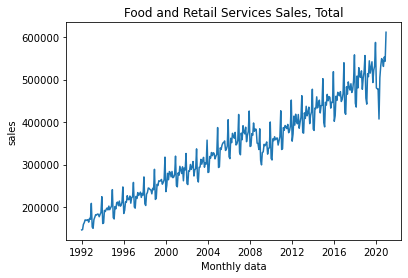

In [7]:
#import data from SQL for Retail and food services sales

import matplotlib.pyplot as plt
from mysql.connector import Error
import seaborn as sns 


conn = mysql.connect(host='localhost', port='3306', user='root',  
                    password='password')
  
cursor = conn.cursor()

sql = ("""
SELECT
    STR_TO_DATE(date,'%m/%d/%Y') as month,
    amount_millions as sales
FROM mrts_all.mrts_table
WHERE 
    business_type = 'Retail and food services sales, total'
    
    """)

cursor.execute(sql)

list = cursor.fetchall()
rf = pd.DataFrame (list, columns=['month','sales'])

rf.month = pd.to_datetime(rf.month)
print(rf)

#graph monthly data 

g1 = sns.lineplot(data=rf, x='month', y='sales')
g1.set_xlabel("Monthly data")
g1.set_title("Food and Retail Services Sales, Total")
g1

cursor.close()
conn.close()



Text(0.5, 1.0, 'Food and Retail Services Sales, Total (Monthly Frequency)')

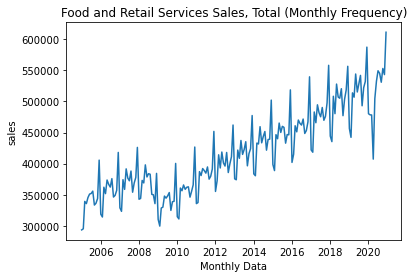

In [8]:
#graph monthly data from 2005 on 
rf2 = rf.iloc[156:]
rf2
g2 = sns.lineplot(data=rf2, x='month', y='sales')
g2.set_xlabel("Monthly Data")
g2.set_title("Food and Retail Services Sales, Total (Monthly Frequency)")

      year      sales
0   2005.0  4085746.0
1   2006.0  4294359.0
2   2007.0  4439733.0
3   2008.0  4391580.0
4   2009.0  4064476.0
5   2010.0  4284968.0
6   2011.0  4598302.0
7   2012.0  4826390.0
8   2013.0  5003332.0
9   2014.0  5218529.0
10  2015.0  5352218.0
11  2016.0  5506136.0
12  2017.0  5732863.0
13  2018.0  5985075.0
14  2019.0  6184582.0
15  2020.0  6215073.0


Text(0.5, 1.0, 'Food and Retail Services Sales, Total (Annual Sales)')

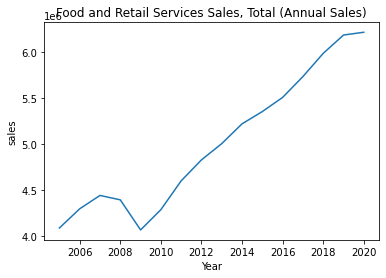

In [9]:
#graph annualized data 

rf["year"] = rf["month"].dt.year
rf["quarter"] = rf["month"].dt.quarter
rf2 = rf.iloc[156:]

yearrf = rf2.drop('month', axis=1)
yearrf = rf2.groupby(['year'])['sales'].sum().reset_index()
print(yearrf)
g3 = sns.lineplot(data=yearrf, x='year', y='sales')
g3.set_xlabel("Year")
g3.set_title("Food and Retail Services Sales, Total (Annual Sales)")

Text(0.5, 1.0, 'Food and Retail Services Sales, Total (Quarterly Sales)')

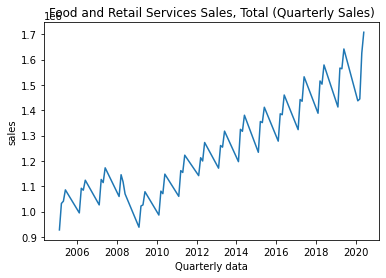

In [10]:
#graph quarterly data 

qrf= rf2.drop('month', axis=1)
qrf = rf2.groupby(['year', 'quarter'])['sales'].sum().reset_index()
qrf["yearByQuarter"] = qrf["year"] + qrf["quarter"]/10

g4 = sns.lineplot(data=qrf, x='yearByQuarter', y='sales')
g4.set_xlabel("Quarterly data")
g4.set_title("Food and Retail Services Sales, Total (Quarterly Sales)")

      year  quarter      sales  yearByQuarter
52  2018.0      1.0  1388042.0         2018.1
53  2018.0      2.0  1515470.0         2018.2
54  2018.0      3.0  1502890.0         2018.3
55  2018.0      4.0  1578673.0         2018.4
56  2019.0      1.0  1412657.0         2019.1
57  2019.0      2.0  1566392.0         2019.2
58  2019.0      3.0  1563737.0         2019.3
59  2019.0      4.0  1641796.0         2019.4
60  2020.0      1.0  1437035.0         2020.1
61  2020.0      2.0  1444512.0         2020.2
62  2020.0      3.0  1625710.0         2020.3
63  2020.0      4.0  1707816.0         2020.4


Text(0.5, 1.0, 'Food and Retail Services Sales, Total (Quarterly Sales)')

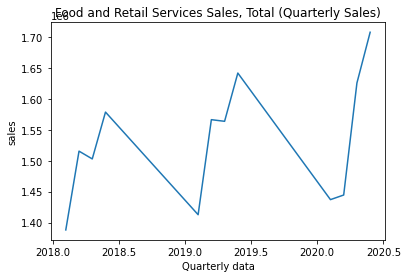

In [11]:
#Take only 2018, 2019, and 2020 quarterly data
qfr2 =qrf.iloc[52:]
print(qfr2)
g5 = sns.lineplot(data= qrf.iloc[52:], x='yearByQuarter', y='sales')
g5.set_xlabel("Quarterly data")
g5.set_title("Food and Retail Services Sales, Total (Quarterly Sales)")


- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, the highest trend of all of these options is for sporting good stores. Sporting good store has the highest trend and grew the fastest over the years of data we have available to us. You can see that in the monthly, quarterly, and annual frequency data I plot below that sporting good stores grows higher and faster than bookstores and hobbies, toys, and games stores. The sales are consistently higher. Also, there is a seasonal pattern, which can be seen through the two charts I plotted using the monthly frequency data I summed over each quarter. The spikes and dips within each year seen in the monthly and quarterly data shows that there is a seasonal element to each business' sales within a given year regardless of the general trend. For this reason, it's easiest to understand general trends in sales within a business type by looking at annualized data. Another option would be to use seasonally adjusted data, which I did not use for this project. For all three business types, there was a downtick in sales in early 2020. Sporting goods stores and hobbies, toys, and games stores had a rebound by the end of 2020, but bookstores continued the downward trend.


In [12]:
#import bookstores, sporting goods stores, and hobbies, toys, and games stores data from SQL 

import matplotlib.pyplot as plt
from mysql.connector import Error
import pandas as pd
import numpy as np


conn = mysql.connect(host='localhost', port='3306', user='root',  
                    password='password')
  
cursor = conn.cursor()


sql3 = (""" 
SELECT 
STR_TO_DATE(date,'%m/%d/%Y') as month,
business_type,
amount_millions as sales
FROM mrts_all.mrts_table
WHERE business_type IN ("Book stores" , 'Sporting goods stores','Hobby, toy, and game stores') ;
    """)

cursor.execute(sql3)

    
list = cursor.fetchall()
data = pd.DataFrame (list, columns=['month','business_type','sales'])

data.month = pd.to_datetime(data.month)
data["year"] = data["month"].dt.year
data["quarter"] = data["month"].dt.quarter

#prepare df to sum sales yearly
data1 = data.drop('month', axis=1)
data1 = data.groupby(['business_type','year'])['sales'].sum().reset_index()

#prepare df to sum sales quarterly
data2 = data.drop('month', axis=1)
data2 = data.groupby(['business_type','year', 'quarter'])['sales'].sum().reset_index()
data2["yearByQuarter"] = data2["year"] + data2["quarter"]/10

cursor.close()
conn.close()

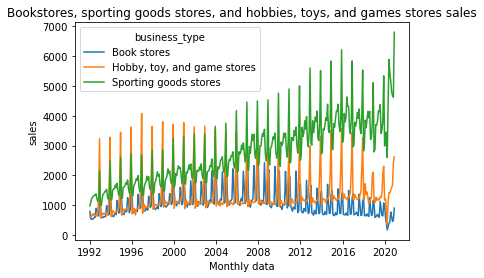

In [13]:
#graph monthly data
monthly = sns.lineplot(data=data, x='month', y='sales', hue='business_type')
monthly.set_xlabel("Monthly data")
monthly.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores sales")

cursor.close()
conn.close()

Text(0.5, 1.0, 'Bookstores, sporting goods stores, and hobbies, toys, and games stores annualized sales')

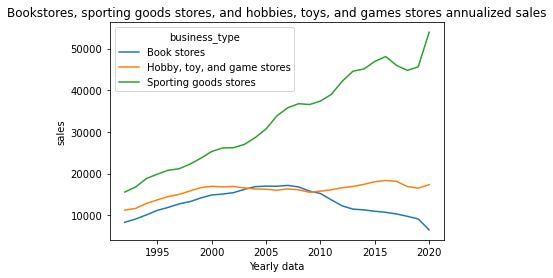

In [14]:
#Plot annualized data
yearly = sns.lineplot(data=data1, x='year', y='sales', hue='business_type')
yearly.set_xlabel("Yearly data")
yearly.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores annualized sales")


Text(0.5, 1.0, 'Bookstores, sporting goods stores, and hobbies, toys, and games stores quarterly sales')

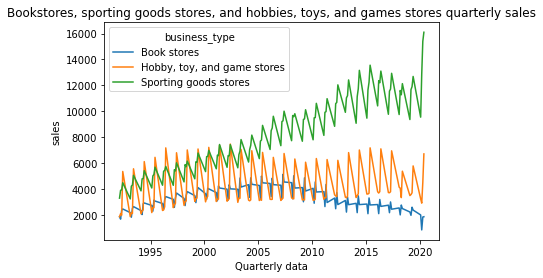

In [15]:
#Plot quarterly data 
quarterly = sns.lineplot(data=data2, x='yearByQuarter', y='sales', hue='business_type')
quarterly.set_xlabel("Quarterly data")
quarterly.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores quarterly sales")


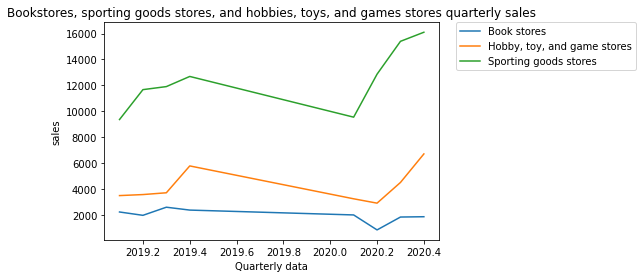

In [16]:
#Plot quarterly data for only 2017 - 2020

newquar = data[(data['month'] > '2018-12-01') & (data['month'] < '2021-01-01')]
newquar = newquar.drop('month', axis=1)
newquar = newquar.groupby(['business_type','year', 'quarter'])['sales'].sum().reset_index()
newquar["yearByQuarter"] = newquar["year"] + newquar["quarter"]/10

quarterly2 = sns.lineplot(data=newquar, x='yearByQuarter', y='sales', hue='business_type')
quarterly2.set_xlabel("Quarterly data")
quarterly2.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores quarterly sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



[Back to top](#Index)

### 3.4 Exploring Percentage Changes

Percentage change is used to calculate by what percentage a variable has changed over a time period. One example is the percentage change from one year to the next in sales for a business type, like women's clothing stores. I calculate percentage change through calling the function pct_change() from the pandas Python library. It is an important measure to predict quantities like spending patterns, because it shows relative change. With percentage change, you can see how much spending is increasing or decreasing based off the previous period. This is an easy way to see how rapidly spending is increasing, decreasing, or if it remains pretty constant.


### Women and Men's clothing store sales
- Below I have calculated the percentage change over 1, 3, 6, and 12 month periods for women's clothing and men's clothing businesses. The two businesses follow a similar trend, however there is more variation in percentage change for men's clothing stores than for women's. For each of the two businesses, the percentage of the sales in relation to clothing stores as a whole is graphed below. Women's clothing store sales have a higher percentage than men's clothing store for the entire data series, however, women's clothing store sales have a steep downward trend (drops from 40 percent of all clothing store sales to only 20 percent) in 1996. From 1996, the downward trend continues (albeit less steep) until 2020 when the percentage jumps up during covid. Men's clothing store sales percentage of total clothing store sales also has a downward trend, however from 2004 onwards, it remains fairly stationary around 5 percent until 2020 when the percentage dips down during covid.

In [17]:
#import clothing store sales from SQL 

conn = mysql.connect(host='localhost', port='3306', user='root',  
                    password='password')
  
cursor = conn.cursor()


sql2 = (""" 
SELECT 
STR_TO_DATE(date,'%m/%d/%Y') as month,
business_type,
amount_millions as sales
FROM mrts_all.mrts_table
WHERE business_type IN ("Women's clothing stores" , "Men's clothing stores", 'Clothing stores') ;
    """)


cursor.execute(sql2)

    
    
list = cursor.fetchall()
data_c = pd.DataFrame (list, columns=['month','business_type','sales'])
data_c.month = pd.to_datetime(data.month)

#calculate percentage change, by 1, 3, 6, and 12 months periods 
data_c['pct_ch_1'] = (data.groupby('business_type')['sales']
                                  .apply(pd.Series.pct_change, periods=1) + 1)
data_c['pct_ch_3'] = (data.groupby('business_type')['sales']
                                  .apply(pd.Series.pct_change, periods=3) + 1)
data_c['pct_ch_6'] = (data.groupby('business_type')['sales']
                                  .apply(pd.Series.pct_change, periods=6) + 1)
data_c['pct_ch_12'] = (data.groupby('business_type')['sales']
                                  .apply(pd.Series.pct_change, periods=12) + 1)
print(data_c)

cursor.close()
conn.close()


          month            business_type   sales  pct_ch_1  pct_ch_3  \
0    1992-01-01          Clothing stores  4852.0       NaN       NaN   
1    1992-02-01          Clothing stores  5159.0  0.682278       NaN   
2    1992-03-01          Clothing stores  6024.0  0.992579       NaN   
3    1992-04-01          Clothing stores  6682.0  0.977570  0.662025   
4    1992-05-01          Clothing stores  6768.0  1.055449  1.024119   
...         ...                      ...     ...       ...       ...   
1042 2020-08-01  Women's clothing stores  2386.0  0.949954  1.179306   
1043 2020-09-01  Women's clothing stores  2494.0  0.930273  0.815865   
1044 2020-10-01  Women's clothing stores  2634.0  0.975224  0.861822   
1045 2020-11-01  Women's clothing stores  2726.0  0.986336  0.894829   
1046 2020-12-01  Women's clothing stores  3399.0  1.471645  1.415574   

      pct_ch_6  pct_ch_12  
0          NaN        NaN  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        N

AxesSubplot(0.125,0.125;0.775x0.755)


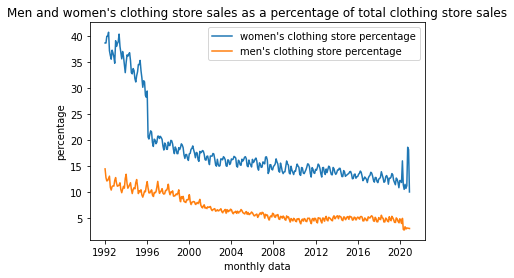

In [18]:
#all
all_table = data_c.iloc[0:349].copy()
all_table = all_table[['month', 'sales']]
all_table = all_table.rename(columns={'sales': 'all_sales'})

#men
men_table = data_c.iloc[349:698].copy()
men_table = men_table[['month', 'sales']]
men_table = men_table.rename(columns={'sales': 'men_sales'})

#women
women_table = data_c.iloc[398:].copy()
women_table = women_table[['month', 'sales']]
women_table = women_table.rename(columns={'sales': 'women_sales'})

#merge
all_table = all_table.merge(men_table, on='month', how='left')
all_table = all_table.merge(women_table, on='month', how='left')

#get percentages of men and women/all
all_table['women_percentage'] = (all_table['women_sales'] / all_table['all_sales'])*100
all_table['men_percentage'] = (all_table['men_sales'] / all_table['all_sales'])*100

#plot percentages
all_plot = sns.lineplot(data=all_table, x="month", y='women_percentage',ci=None)
all_plot = sns.lineplot(data=all_table, x="month", y='men_percentage')
all_plot.set_xlabel("monthly data")
all_plot.set_ylabel("percentage")
all_plot.set_title("Men and women's clothing store sales as a percentage of total clothing store sales")
plt.legend(labels=["women's clothing store percentage","men's clothing store percentage"])

print(all_plot)


AxesSubplot(0.125,0.125;0.775x0.755)


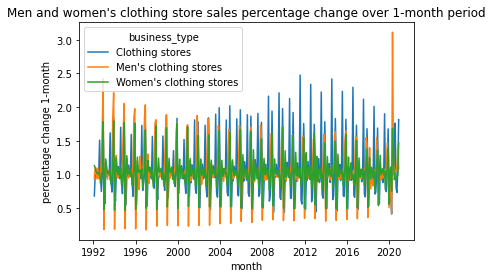

In [19]:
p1 = sns.lineplot(data=data_c, x='month', y='pct_ch_1', hue='business_type')
p1.set_ylabel("percentage change 1-month")
p1.set_title("Men and women's clothing store sales percentage change over 1-month period")

print(p1)

AxesSubplot(0.125,0.125;0.775x0.755)


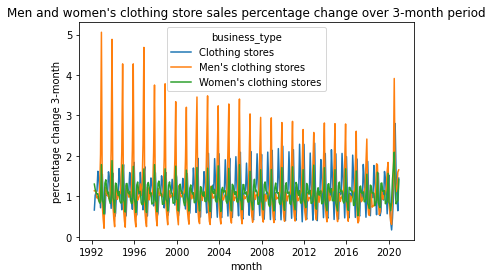

In [20]:
p3 = sns.lineplot(data=data_c, x='month', y='pct_ch_3', hue='business_type')
p3.set_ylabel("percentage change 3-month")
p3.set_title("Men and women's clothing store sales percentage change over 3-month period")

print(p3)

Text(0.5, 1.0, "Men and women's clothing store sales percentage change over 6-month period")

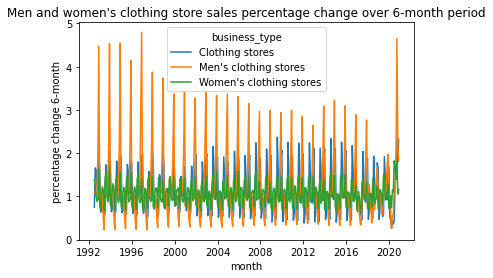

In [21]:
p6 = sns.lineplot(data=data_c, x='month', y='pct_ch_6', hue='business_type')
p6.set_ylabel("percentage change 6-month")
p6.set_title("Men and women's clothing store sales percentage change over 6-month period")



Text(0.5, 1.0, "Men and women's clothing store sales percentage change over 12-month period")

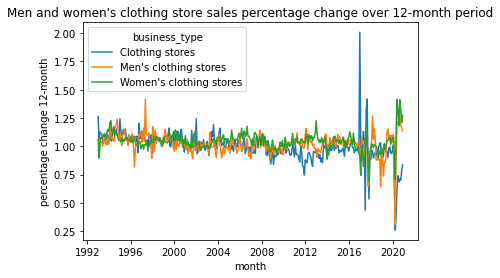

In [22]:
p12 = sns.lineplot(data=data_c, x='month', y='pct_ch_12', hue='business_type')
p12.set_ylabel("percentage change 12-month")
p12.set_title("Men and women's clothing store sales percentage change over 12-month period")


[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

A rolling time window can be used to calculate moving averages. This is considered an important measure to predict quantities like spending patterns because it smoothes a data series by consolidating monthly data points into longer units of time—namely an average of several months' data. Taking a moving average is a smoothing technique designed to reduce or eliminate short-term volatility in data. A smoothed series is preferred to a non-smoothed one because it may capture changes in the direction of the economy better than the unadjusted series does. I have used the pandas Python library rolling function to calculate moving averages of 3, 6, and 12 months worth of sales data. This is also useful because I use unadjusted sales data instead of seasonally adjusted data which is another smoothing technique. 

- Below I have written queries for food services and drinking places and grocery stores to analyze sales patterns and produce graphs of rolling time windows. For both types of businesses, the 12-month rolling window smoothed out the data the best, which was expected and you could see how grocery stores and food services were inversely affected during the pandemic. Sales increased for grocery stores and decreased for food services which is what would be expected due to covid-19 lockdowns. 

In [23]:
#Import 'Food services and drinking places' sales data from SQL and calculate rolling means 


conn = mysql.connect(host='localhost', port='3306', user='root',  
                    password='password')
  
cursor = conn.cursor()


sqlfd = (""" 
SELECT 
STR_TO_DATE(date,'%m/%d/%Y') as month,
business_type,
amount_millions as sales
FROM mrts_all.mrts_table
WHERE business_type IN ('Food services and drinking places') ;
    """)


cursor.execute(sqlfd)

    
    
list = cursor.fetchall()
food_drink = pd.DataFrame (list, columns=['month','business_type','sales'])

food_drink.month = pd.to_datetime(food_drink.month)
                        
food_drink['moving_average_3'] = food_drink['sales'].rolling(window=3).mean()
food_drink['moving_average_6'] = food_drink['sales'].rolling(window=6).mean()
food_drink['moving_average_12'] = food_drink['sales'].rolling(window=12).mean()
print(food_drink)

cursor.close()
conn.close()

         month                      business_type    sales  moving_average_3  \
0   1992-01-01  Food services and drinking places  15693.0               NaN   
1   1992-02-01  Food services and drinking places  15835.0               NaN   
2   1992-03-01  Food services and drinking places  16848.0      16125.333333   
3   1992-04-01  Food services and drinking places  16494.0      16392.333333   
4   1992-05-01  Food services and drinking places  17648.0      16996.666667   
..         ...                                ...      ...               ...   
344 2020-08-01  Food services and drinking places  56358.0      54114.000000   
345 2020-09-01  Food services and drinking places  54740.0      55203.000000   
346 2020-10-01  Food services and drinking places  57392.0      56163.333333   
347 2020-11-01  Food services and drinking places  50911.0      54347.666667   
348 2020-12-01  Food services and drinking places  51497.0      53266.666667   

     moving_average_6  moving_average_1

Text(0.5, 1.0, 'Food services and drinking places 3-month moving average sales')

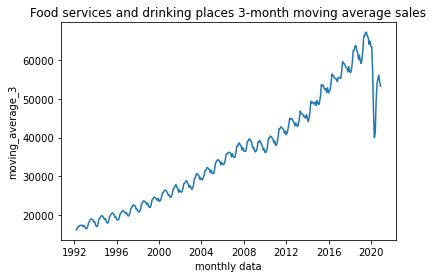

In [24]:
#'Food services and drinking places' plotting 3-month moving average sales
food_drink1 = sns.lineplot(data=food_drink, x='month', y='moving_average_3')
food_drink1.set_xlabel("monthly data")
food_drink1.set_title("Food services and drinking places 3-month moving average sales")

Text(0.5, 1.0, 'Food services and drinking places 6-month moving average sales')

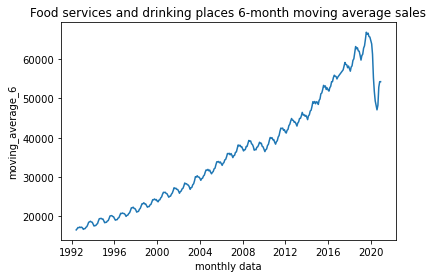

In [25]:
#'Food services and drinking places' plotting 6-month moving average sales
food_drink2 = sns.lineplot(data=food_drink, x='month', y='moving_average_6')
food_drink2.set_xlabel("monthly data")
food_drink2.set_title("Food services and drinking places 6-month moving average sales")

Text(0.5, 1.0, 'Food services and drinking places 12-month moving average sales')

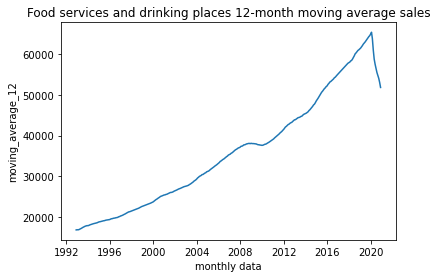

In [26]:
#'Food services and drinking places' plotting 12-month moving average sales
food_drink3 = sns.lineplot(data=food_drink, x='month', y='moving_average_12')
food_drink3.set_xlabel("monthly data")
food_drink3.set_title("Food services and drinking places 12-month moving average sales")

In [27]:
#Import grocery stores sales data from SQL and calculate rolling means 

conn = mysql.connect(host='localhost', port='3306', user='root',  
                    password='password')
  
cursor = conn.cursor()


sqlg = (""" 
SELECT 
STR_TO_DATE(date,'%m/%d/%Y') as month,
business_type,
amount_millions as sales
FROM mrts_all.mrts_table
WHERE business_type IN ('Grocery stores') ;
    """)


cursor.execute(sqlg)

    
    
list = cursor.fetchall()
grocery = pd.DataFrame (list, columns=['month','business_type','sales'])

grocery.month = pd.to_datetime(food_drink.month)
                        
grocery['moving_average_3'] = grocery['sales'].rolling(window=3).mean()
grocery['moving_average_6'] = grocery['sales'].rolling(window=6).mean()
grocery['moving_average_12'] = grocery['sales'].rolling(window=12).mean()
print(grocery)

cursor.close()
conn.close()

         month   business_type    sales  moving_average_3  moving_average_6  \
0   1992-01-01  Grocery stores  27306.0               NaN               NaN   
1   1992-02-01  Grocery stores  26223.0               NaN               NaN   
2   1992-03-01  Grocery stores  27235.0      26921.333333               NaN   
3   1992-04-01  Grocery stores  27588.0      27015.333333               NaN   
4   1992-05-01  Grocery stores  28883.0      27902.000000               NaN   
..         ...             ...      ...               ...               ...   
344 2020-08-01  Grocery stores  64500.0      65121.666667      67014.166667   
345 2020-09-01  Grocery stores  62100.0      64497.333333      65047.333333   
346 2020-10-01  Grocery stores  64017.0      63539.000000      64986.333333   
347 2020-11-01  Grocery stores  63920.0      63345.666667      64233.666667   
348 2020-12-01  Grocery stores  67027.0      64988.000000      64742.666667   

     moving_average_12  
0                  NaN  
1

Text(0.5, 1.0, 'Grocery stores 3-month moving average sales')

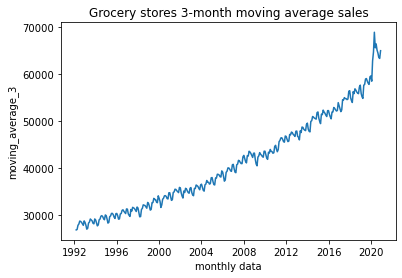

In [28]:
#Grocery stores - plotting 3-month moving average sales
grocery1 = sns.lineplot(data=grocery, x='month', y='moving_average_3')
grocery1.set_xlabel("monthly data")
grocery1.set_title("Grocery stores 3-month moving average sales")

Text(0.5, 1.0, 'Grocery stores 6-month moving average sales')

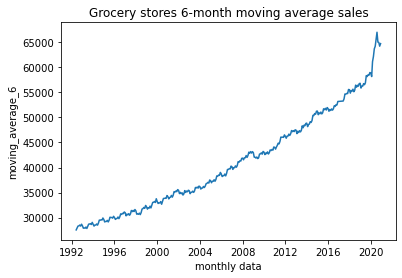

In [29]:
#Grocery stores - plotting 6-month moving average sales
grocery2 = sns.lineplot(data=grocery, x='month', y='moving_average_6')
grocery2.set_xlabel("monthly data")
grocery2.set_title("Grocery stores 6-month moving average sales")

Text(0.5, 1.0, 'Grocery stores 12-month moving average sales')

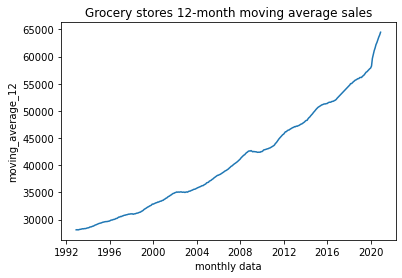

In [30]:
#Grocery stores - plotting 12-month moving average sales
grocery3 = sns.lineplot(data=grocery, x='month', y='moving_average_12')
grocery3.set_xlabel("monthly data")
grocery3.set_title("Grocery stores 12-month moving average sales")

[Back to top](#Index)

## Conclusion

My conclusion is that next time I perform ETL I will be more mindful to select seasonally adjusted data if available. Overall, from my analyis, I believe that bookstores and men's clothing stores attract the least spending. They both are also following a downward trend so likely will continue in the near future. The businesses that are likely to attract the most spending are grocery stores and sporting good stores. They both have had an upward spike due to covid and are likely to remain high due to a change in consumer behavior by going out to eat less and an increase in outdoor activies to remain covid safe.



[Back to top](#Index
)
## References

Federal Reserve Bank of Dallas. "Smoothing Data with Moving Averages." Federal Reserve Bank of Dallas. Federal Reserve Bank of Dallas, 2021. https://www.dallasfed.org/research/basics/moving.aspx

United States Census Bureau. "Monthly Retail Trade Survey." United States Census Bureau. United States Census Bureau, 2021. https://www.census.gov/econ/overview/re0400.html

